### Introduction
_____________________________________________
##### Dans le cadre du projet d'expansion de notre entreprise Academy, nous devons réaliser une analyse exploratoire d'un jeu de données de la Banque mondiale, afin de pouvoir apporter des leviers de décisions au board pour le deploiement de nos formations vers de nouveaux pays.
- [Qualité jeu de données (duplicas, manquants)](#1) : Beaucoup de NaN (83% minimum)
- [Décrire les infos (nombre colonnes, lignes)](#2) : 886930 70
- [Selectionner des indicateurs pertinents](#3) : GNI-PPP / Internet users / Enrolment in upper secondary / Enrolment in tertiary / Population, ages 15-24
- [Déterminer ordres grandeurs des indicateurs (moyenne, mediane...)](#4) 
- [Identifier pays à fort potentiel, et qualifier leur evolution](#5) : Chine / USA / Brésil (Sans outliers)
- [Calcul croissance Pays top 3](#6)
- [Recommandation sur pays à cibler (scenar croissance, value, mediane)](#7)

## <a id =1 style='color:Green'> Qualité du jeu de données </a>
<span style='color:Green'> _____ </span>

### DataFrame disponibles
- EdStatsCountry
- EdStatsCountrySerie
- EdStatsData
- EdStatsFootNote
- EdStatsSeries
- EdStatsGrowth

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

data1 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsFootNote.csv")
data1.columns
#Aucune donnée utile

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [2]:
data2 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsCountry-Series.csv")
data2.columns
#Aucune donnée utile

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [3]:
data3 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsSeries.csv")
data3.columns
#Aucune donnée utile

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [4]:
data4 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsCountry.csv")
data4.columns
#Données utiles: Income Group (redondant avec GNI-PPP mais gardé pour vérif)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [5]:
data5 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsData.csv")
data5.columns
#Données utiles: Population, ages 15-24, tota / GNI,PPP / Internet users / Enrolment in upper secondary / Enrolment in tertiary

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [6]:
data6 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsCountryGrowth.csv", sep=';', header=1)
#Infos sur la croissance demographique

### Importer data frame EdStatsCountry et l'afficher

In [7]:
data_income = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsCountry.csv")
data_income

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


### Supprimer colonnes inutiles et renommer

In [8]:
for c in data_income.columns:
    if c not in ['Short Name','Income Group']:
        del data_income[c]
data_income
#Pour mettre une boucle for 

,Short Name,Income Group
0,Aruba,High income: nonOECD
1,Afghanistan,Low income
2,Angola,Upper middle income
3,Albania,Upper middle income
4,Andorra,High income: nonOECD
...,...,...
236,Kosovo,Lower middle income
237,Yemen,Lower middle income
238,South Africa,Upper middle income
239,Zambia,Lower middle income


### Renommer les colonnes

In [9]:
data_income.columns = ['PAYS', 'INCOME']
data_income

,PAYS,INCOME
0,Aruba,High income: nonOECD
1,Afghanistan,Low income
2,Angola,Upper middle income
3,Albania,Upper middle income
4,Andorra,High income: nonOECD
...,...,...
236,Kosovo,Lower middle income
237,Yemen,Lower middle income
238,South Africa,Upper middle income
239,Zambia,Lower middle income


In [10]:
data_income.groupby('INCOME')['INCOME'].count()

INCOME
High income: OECD       31
High income: nonOECD    44
Low income              34
Lower middle income     50
Upper middle income     55
Name: INCOME, dtype: int64

### Importer data frame EdStatsData et l'afficher

In [11]:
data_indicateurs = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsData.csv")
data_indicateurs

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renommer les colonnes

In [12]:
data_indicateurs.columns = ['PAYS', 'CODE_PAYS', 'INDICATEUR', 'CODE', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'VIDE',]
data_indicateurs

,PAYS,CODE_PAYS,INDICATEUR,CODE,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,VIDE
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Supprimer colonnes inutiles

In [13]:
for c in data_indicateurs.columns:
    if c not in ['PAYS','INDICATEUR', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']:
        del data_indicateurs[c]
data_indicateurs

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,2017,2020
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Adjusted net enrolment rate, primary, both sex...",85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,"Youth illiterate population, 15-24 years, male...",166679.00000,NaN,NaN,199464.000000,NaN,NaN,NaN,NaN
886926,Zimbabwe,"Youth literacy rate, population 15-24 years, b...",90.93070,NaN,NaN,90.428120,NaN,NaN,NaN,NaN
886927,Zimbabwe,"Youth literacy rate, population 15-24 years, f...",92.12456,NaN,NaN,93.188350,NaN,NaN,NaN,NaN
886928,Zimbabwe,"Youth literacy rate, population 15-24 years, g...",1.02828,NaN,NaN,1.063890,NaN,NaN,NaN,NaN


### Importer data frame EdStatsCountryGrowth et l'afficher

In [14]:
data_growth = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P2\BDD\EdStatsCountryGrowth.csv", sep=';', header=1)
data_growth

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 64
0,Aruba,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,0.599694,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,NaN
1,Afghanistan,Population growth (annual %),SP.POP.GROW,NaN,1.898499,1.965805,2.029830,2.090208,2.147639,2.171068,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,NaN
2,Angola,Population growth (annual %),SP.POP.GROW,NaN,1.392891,1.383296,1.256405,0.973970,0.618450,0.185805,...,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530,NaN
3,Albania,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,...,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942,NaN
4,Andorra,Population growth (annual %),SP.POP.GROW,NaN,6.969856,6.730368,6.470513,6.254806,5.978230,5.783533,...,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Kosovo,Population growth (annual %),SP.POP.GROW,NaN,1.986474,2.857337,2.777956,2.702867,2.631731,2.564243,...,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.457730,-0.757525,NaN
237,Yemen,Population growth (annual %),SP.POP.GROW,NaN,1.450907,1.484139,1.506696,1.515089,1.515455,1.533227,...,2.757339,2.716540,2.654141,2.578030,2.498277,2.423989,2.357044,2.300594,2.251561,NaN
238,South Africa,Population growth (annual %),SP.POP.GROW,NaN,2.453291,2.486444,2.514218,2.535789,2.552492,2.563834,...,1.581354,1.604367,1.583787,1.532243,1.471933,1.416947,1.363703,1.316292,1.273356,NaN
239,Zambia,Population growth (annual %),SP.POP.GROW,NaN,3.000974,2.998369,3.004541,3.022576,3.049993,3.074720,...,3.102914,3.139940,3.121249,3.066671,3.002935,2.951463,2.912653,2.893018,2.885686,NaN


### Supprimer colonnes inutiles

In [15]:
for c in data_growth.columns:
    if c not in ['Country Name', '2020']:
        del data_growth[c]
data_growth

,Country Name,2020
0,Aruba,0.428017
1,Afghanistan,2.303812
2,Angola,3.218530
3,Albania,-0.577942
4,Andorra,0.154134
...,...,...
236,Kosovo,-0.757525
237,Yemen,2.251561
238,South Africa,1.273356
239,Zambia,2.885686


### Renommer les colonnes

In [16]:
data_growth.columns = ['PAYS', 'GROWTH(%)']
data_growth

,PAYS,GROWTH(%)
0,Aruba,0.428017
1,Afghanistan,2.303812
2,Angola,3.218530
3,Albania,-0.577942
4,Andorra,0.154134
...,...,...
236,Kosovo,-0.757525
237,Yemen,2.251561
238,South Africa,1.273356
239,Zambia,2.885686


## <a id =2 style='color:Green'> Décrire les infos </a>
<span style='color:Green'> _____ </span>

### Vérifier type données

In [17]:
data_income.dtypes

PAYS      object
INCOME    object
dtype: object

In [18]:
data_indicateurs.dtypes

PAYS           object
INDICATEUR     object
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
2020          float64
dtype: object

In [19]:
data_growth.dtypes

PAYS          object
GROWTH(%)    float64
dtype: object

### Calculer nombre de lignes, colonnes

In [20]:
r, c = data_indicateurs.shape
print(r, c)

886930 10


In [21]:
r, c = data_income.shape
print(r, c)

241 2


In [22]:
r, c = data_growth.shape
print(r, c)

241 2


In [23]:
data_income

,PAYS,INCOME
0,Aruba,High income: nonOECD
1,Afghanistan,Low income
2,Angola,Upper middle income
3,Albania,Upper middle income
4,Andorra,High income: nonOECD
...,...,...
236,Kosovo,Lower middle income
237,Yemen,Lower middle income
238,South Africa,Upper middle income
239,Zambia,Lower middle income


In [24]:
data_income.sort_values('PAYS')
#Pour remettre Aruba à la bonne place en prévision du merge

,PAYS,INCOME
1,Afghanistan,Low income
3,Albania,Upper middle income
56,Algeria,Upper middle income
9,American Samoa,Upper middle income
4,Andorra,High income: nonOECD
...,...,...
181,West Bank and Gaza,Lower middle income
234,World,NaN
237,Yemen,Lower middle income
239,Zambia,Lower middle income


In [25]:
data_growth.sort_values('PAYS')
#Idem

,PAYS,GROWTH(%)
1,Afghanistan,2.303812
3,Albania,-0.577942
56,Algeria,1.836534
9,American Samoa,-0.208128
4,Andorra,0.154134
...,...,...
181,West Bank and Gaza,2.486550
234,World,1.035991
237,Yemen,2.251561
239,Zambia,2.885686


### Tester valeurs manquantes

In [26]:
data_indicateurs.isna().mean()
#Grand nombre de valeurs manquantes => Necessité selection indeicateurs pertinents

PAYS          0.000000
INDICATEUR    0.000000
2011          0.835374
2012          0.833962
2013          0.844961
2014          0.871705
2015          0.852234
2016          0.981442
2017          0.999839
2020          0.942007
dtype: float64

<AxesSubplot:>

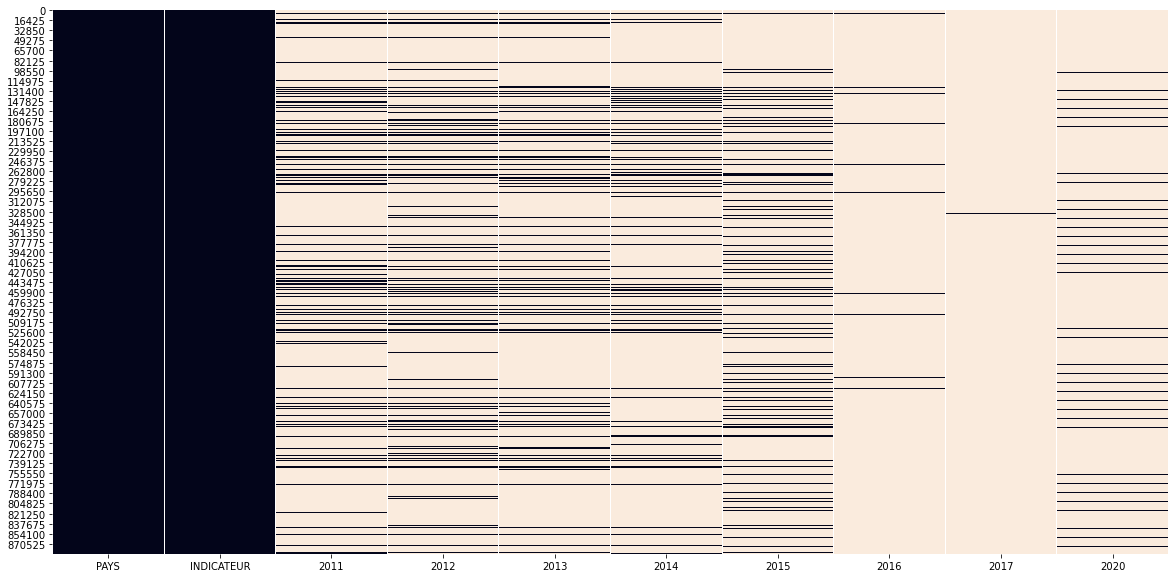

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(data_indicateurs.isna(), cbar=False)

## <a id =3 style='color:Green'> Sélectionner les indicateur pertinents </a>
<span style='color:Green'> _____ </span>

### Création d'une liste d'indicateurs
- Technologique: Utilisateurs d'internet \ 100 personnes (reflète la capacité d'accès au cours en ligne)
- Demographique: Population au Lycée et en Université \ Population 15-24 ans (pool de clients)
- Richesse: Pouvoir d'achat par habitant (reflète la capacité à financer les études)

In [28]:
liste_indicateurs = ['GNI per capita, PPP (current international $)', 'Population, ages 15-24, total', 'Internet users (per 100 people)', 'Enrolment in upper secondary general, both sexes (number)', 'Enrolment in tertiary education, all programmes, both sexes (number)']

In [29]:
data_indicateurs['INDICATEUR'].isin(liste_indicateurs)

0         False
1         False
2         False
3         False
4         False
          ...  
886925    False
886926    False
886927    False
886928    False
886929    False
Name: INDICATEUR, Length: 886930, dtype: bool

### Filtrer le DataSet

In [30]:
_index = data_indicateurs['INDICATEUR'].isin(liste_indicateurs)
data = data_indicateurs[_index]
data

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,2017,2020
1204,Arab World,"Enrolment in tertiary education, all programme...",8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN,NaN,NaN
1220,Arab World,"Enrolment in upper secondary general, both sex...",9.190047e+06,9.568954e+06,9.550892e+06,9.621427e+06,NaN,NaN,NaN,NaN
1252,Arab World,"GNI per capita, PPP (current international $)",1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN,NaN,NaN
1375,Arab World,Internet users (per 100 people),2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN
2482,Arab World,"Population, ages 15-24, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
884469,Zimbabwe,"Enrolment in tertiary education, all programme...",9.328500e+04,9.401200e+04,9.411500e+04,NaN,1.355750e+05,NaN,NaN,NaN
884485,Zimbabwe,"Enrolment in upper secondary general, both sex...",NaN,4.810060e+05,4.905220e+05,NaN,NaN,NaN,NaN,NaN
884517,Zimbabwe,"GNI per capita, PPP (current international $)",1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03,1810.000000,NaN,NaN
884640,Zimbabwe,Internet users (per 100 people),8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,23.119989,NaN,NaN


### Tester valeurs manquantes

In [31]:
data.isna().mean()
#Beaucoup moins de valeurs manquantes mais 2017 et 2020 inutiles

PAYS          0.000000
INDICATEUR    0.000000
2011          0.193388
2012          0.198347
2013          0.213223
2014          0.244628
2015          0.395868
2016          0.645455
2017          1.000000
2020          1.000000
dtype: float64

In [32]:
data = data.drop(columns = ['2020'])

In [33]:
data = data.drop(columns = ['2017'])

In [34]:
data

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
1204,Arab World,"Enrolment in tertiary education, all programme...",8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN,NaN
1220,Arab World,"Enrolment in upper secondary general, both sex...",9.190047e+06,9.568954e+06,9.550892e+06,9.621427e+06,NaN,NaN
1252,Arab World,"GNI per capita, PPP (current international $)",1.499616e+04,1.584650e+04,1.614156e+04,NaN,NaN,NaN
1375,Arab World,Internet users (per 100 people),2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
2482,Arab World,"Population, ages 15-24, total",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
884469,Zimbabwe,"Enrolment in tertiary education, all programme...",9.328500e+04,9.401200e+04,9.411500e+04,NaN,1.355750e+05,NaN
884485,Zimbabwe,"Enrolment in upper secondary general, both sex...",NaN,4.810060e+05,4.905220e+05,NaN,NaN,NaN
884517,Zimbabwe,"GNI per capita, PPP (current international $)",1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03,1810.000000
884640,Zimbabwe,Internet users (per 100 people),8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,23.119989


### Isoler sur 2016 la dernière valeur non nulle de chaque ligne

In [35]:
dataint = data.interpolate(method = 'pad', axis=1)
dataint

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
1204,Arab World,"Enrolment in tertiary education, all programme...",8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,9.966484e+06,9.966484e+06
1220,Arab World,"Enrolment in upper secondary general, both sex...",9.190047e+06,9.568954e+06,9.550892e+06,9.621427e+06,9.621427e+06,9.621427e+06
1252,Arab World,"GNI per capita, PPP (current international $)",1.499616e+04,1.584650e+04,1.614156e+04,1.614156e+04,1.614156e+04,1.614156e+04
1375,Arab World,Internet users (per 100 people),2.970776e+01,3.401422e+01,3.686860e+01,3.686860e+01,3.686860e+01,3.686860e+01
2482,Arab World,"Population, ages 15-24, total",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
884469,Zimbabwe,"Enrolment in tertiary education, all programme...",9.328500e+04,9.401200e+04,9.411500e+04,9.411500e+04,1.355750e+05,1.355750e+05
884485,Zimbabwe,"Enrolment in upper secondary general, both sex...",NaN,4.810060e+05,4.905220e+05,4.905220e+05,4.905220e+05,4.905220e+05
884517,Zimbabwe,"GNI per capita, PPP (current international $)",1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03,1.810000e+03
884640,Zimbabwe,Internet users (per 100 people),8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,2.311999e+01


In [36]:
data_clean = dataint.drop(columns = ['2011', '2012', '2013', '2014', '2015'])
data_clean

,PAYS,INDICATEUR,2016
1204,Arab World,"Enrolment in tertiary education, all programme...",9.966484e+06
1220,Arab World,"Enrolment in upper secondary general, both sex...",9.621427e+06
1252,Arab World,"GNI per capita, PPP (current international $)",1.614156e+04
1375,Arab World,Internet users (per 100 people),3.686860e+01
2482,Arab World,"Population, ages 15-24, total",NaN
...,...,...,...
884469,Zimbabwe,"Enrolment in tertiary education, all programme...",1.355750e+05
884485,Zimbabwe,"Enrolment in upper secondary general, both sex...",4.905220e+05
884517,Zimbabwe,"GNI per capita, PPP (current international $)",1.810000e+03
884640,Zimbabwe,Internet users (per 100 people),2.311999e+01


### Mettre 1 indicateur/ligne et pays en colonnes

In [37]:
df = data_clean.pivot(index = 'PAYS', columns = 'INDICATEUR', values = '2016')
df

INDICATEUR,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
PAYS,,,,,
Afghanistan,262874.0,943750.0,1900.000000,10.595726,7252785.0
Albania,160527.0,125256.0,11670.000000,66.363445,556269.0
Algeria,1289474.0,1508964.0,14420.000000,42.945527,6467818.0
American Samoa,NaN,NaN,NaN,NaN,NaN
Andorra,501.0,925.0,NaN,97.930637,NaN
...,...,...,...,...,...
West Bank and Gaza,221018.0,139338.0,NaN,61.178385,1053004.0
World,212670016.0,193087776.0,16161.195984,45.910282,NaN
"Yemen, Rep.",267498.0,690326.0,2500.000000,24.579208,5995687.0


### Supprimer groupe de pays inutiles

In [38]:
for c in df.index:
    if c in ['Euro area', 'North America', 'Middle East & North Africa', 'North America ', 'Europe & Central Asia (excluding high income)', 'European Union', 'Middle East & North Africa ', 'Middle East & North Africa (excluding high income)', 'Arab World', 'Middle East & North Africa ', 'Europe & Central Asia', 'Low income', 'Europe & Central Asia ', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Sub-Saharan Africa', 'OECD members', 'Heavily indebted poor countries (HIPC)', 'High income', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa ', 'Least developed countries: UN classification', 'East Asia & Pacific', 'Sub-Saharan Africa  ', 'Least developed countries: UN classification ', 'East Asia & Pacific ', 'South Asia', 'Low & middle income', 'India', 'East Asia & Pacific (excluding high income)', 'East Asia & Pacific ', 'South Asia ', 'Low & middle income ', 'Afghanistan', 'Upper middle income', 'Lower middle income', 'Middle income', 'Low & middle income ', 'World']:
        df= df.drop(index=c)

In [39]:
for c in data_income.index:
    if c in ['Euro area', 'North America', 'Middle East & North Africa', 'North America ', 'Europe & Central Asia (excluding high income)', 'European Union', 'Middle East & North Africa ', 'Middle East & North Africa (excluding high income)', 'Arab World', 'Middle East & North Africa ', 'Europe & Central Asia', 'Low income', 'Europe & Central Asia ', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Sub-Saharan Africa', 'OECD members', 'Heavily indebted poor countries (HIPC)', 'High income', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa ', 'Least developed countries: UN classification', 'East Asia & Pacific', 'Sub-Saharan Africa  ', 'Least developed countries: UN classification ', 'East Asia & Pacific ', 'South Asia', 'Low & middle income', 'India', 'East Asia & Pacific (excluding high income)', 'East Asia & Pacific ', 'South Asia ', 'Low & middle income ', 'Afghanistan', 'Upper middle income', 'Lower middle income', 'Middle income', 'Low & middle income ', 'World']:
        ddata_income= data_income.drop(index=c)

### Merge DataFrame Income et Growth

In [40]:
df_merge = pd.merge(df, data_income, on="PAYS")
df_merge

,PAYS,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total",INCOME
0,Albania,160527.0,125256.0,11670.0,66.363445,556269.0,Upper middle income
1,Algeria,1289474.0,1508964.0,14420.0,42.945527,6467818.0,Upper middle income
2,American Samoa,NaN,NaN,NaN,NaN,NaN,Upper middle income
3,Andorra,501.0,925.0,NaN,97.930637,NaN,High income: nonOECD
4,Angola,221037.0,80833.0,6100.0,13.000000,4259352.0,Upper middle income
...,...,...,...,...,...,...,...
190,Vanuatu,NaN,3706.0,3050.0,24.000000,55081.0,Lower middle income
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income
192,West Bank and Gaza,221018.0,139338.0,NaN,61.178385,1053004.0,Lower middle income
193,Zambia,56680.0,292012.0,3850.0,25.506579,3068044.0,Lower middle income


In [41]:
df_complet = pd.merge(df_merge, data_growth, on="PAYS")
df_complet

,PAYS,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total",INCOME,GROWTH(%)
0,Albania,160527.0,125256.0,11670.0,66.363445,556269.0,Upper middle income,-0.577942
1,Algeria,1289474.0,1508964.0,14420.0,42.945527,6467818.0,Upper middle income,1.836534
2,American Samoa,NaN,NaN,NaN,NaN,NaN,Upper middle income,-0.208128
3,Andorra,501.0,925.0,NaN,97.930637,NaN,High income: nonOECD,0.154134
4,Angola,221037.0,80833.0,6100.0,13.000000,4259352.0,Upper middle income,3.218530
...,...,...,...,...,...,...,...,...
190,Vanuatu,NaN,3706.0,3050.0,24.000000,55081.0,Lower middle income,2.394716
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518
192,West Bank and Gaza,221018.0,139338.0,NaN,61.178385,1053004.0,Lower middle income,2.486550
193,Zambia,56680.0,292012.0,3850.0,25.506579,3068044.0,Lower middle income,2.885686


### Renommer les colonnes

In [42]:
df_complet.columns = ['pays', 'nbre_inscrits_univ', 'nbre_inscrits_lycee', 'GNI-PPP par pers', 'utilisateur d\'internet / 100 pers.', 'pop 15-24 ans', 'revenu', 'croissance(%)']
df_complet

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%)
0,Albania,160527.0,125256.0,11670.0,66.363445,556269.0,Upper middle income,-0.577942
1,Algeria,1289474.0,1508964.0,14420.0,42.945527,6467818.0,Upper middle income,1.836534
2,American Samoa,NaN,NaN,NaN,NaN,NaN,Upper middle income,-0.208128
3,Andorra,501.0,925.0,NaN,97.930637,NaN,High income: nonOECD,0.154134
4,Angola,221037.0,80833.0,6100.0,13.000000,4259352.0,Upper middle income,3.218530
...,...,...,...,...,...,...,...,...
190,Vanuatu,NaN,3706.0,3050.0,24.000000,55081.0,Lower middle income,2.394716
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518
192,West Bank and Gaza,221018.0,139338.0,NaN,61.178385,1053004.0,Lower middle income,2.486550
193,Zambia,56680.0,292012.0,3850.0,25.506579,3068044.0,Lower middle income,2.885686


### Supprimer lignes à valeurs NaN

In [43]:
df_complet = df_complet.dropna(axis=0, how='any')
df_complet

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%)
0,Albania,160527.0,125256.0,11670.0,66.363445,556269.0,Upper middle income,-0.577942
1,Algeria,1289474.0,1508964.0,14420.0,42.945527,6467818.0,Upper middle income,1.836534
4,Angola,221037.0,80833.0,6100.0,13.000000,4259352.0,Upper middle income,3.218530
6,Argentina,2869450.0,1722700.0,19530.0,70.150764,6886530.0,Upper middle income,0.970054
7,Armenia,107665.0,76771.0,9040.0,62.000000,446958.0,Lower middle income,0.185983
...,...,...,...,...,...,...,...,...
187,United States,19531728.0,11736315.0,58700.0,76.176737,45147517.0,High income: OECD,0.350911
188,Uruguay,145787.0,83671.0,21130.0,66.400000,519298.0,High income: nonOECD,0.345933
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518
193,Zambia,56680.0,292012.0,3850.0,25.506579,3068044.0,Lower middle income,2.885686


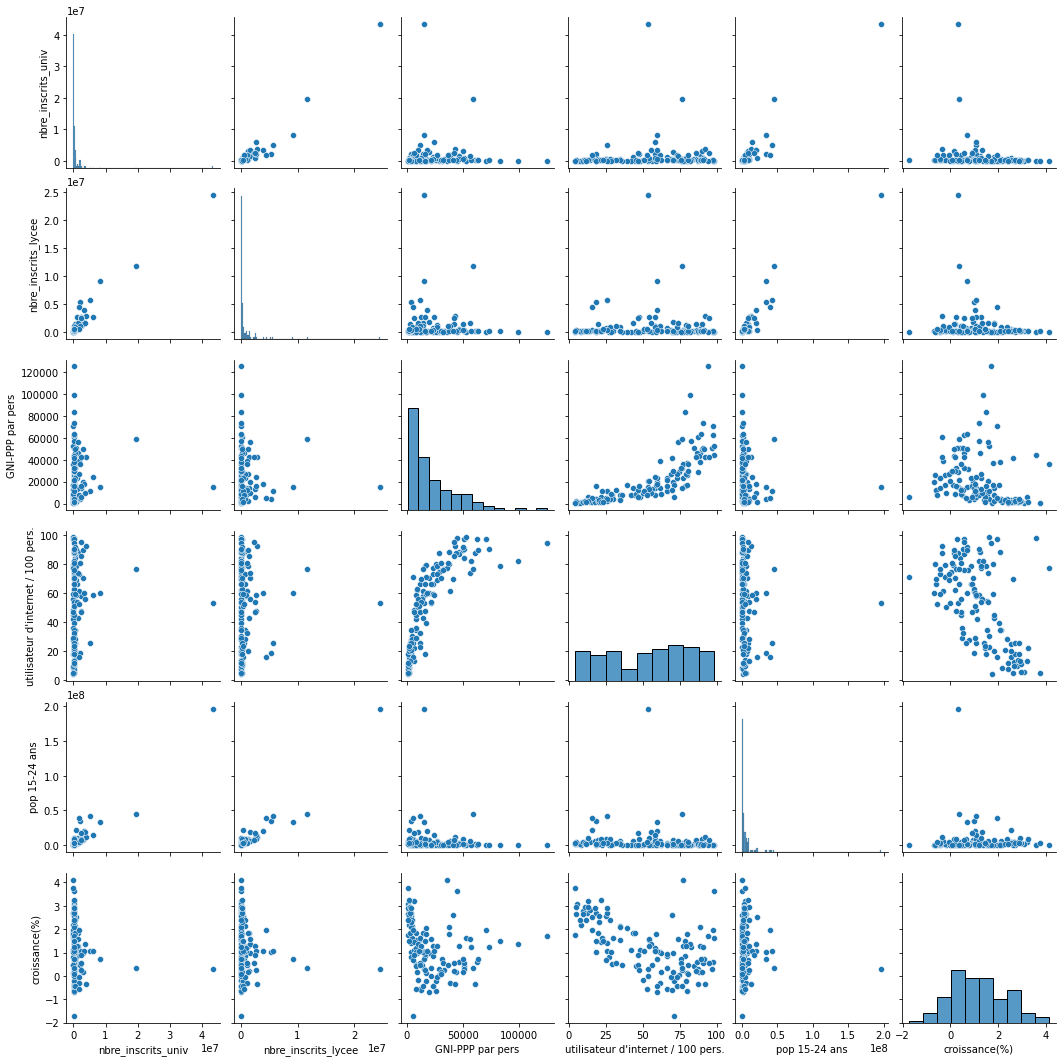

In [44]:
sns.pairplot(df_complet)
# Corrélation apparente entre nombre inscrit lycée et université -> On garde quand même les 2 pour pouvoir présenter les valeurs

## <a id =4 style='color:Green'> Déterminer ordres grandeurs des indicateurs </a>
<span style='color:Green'> _____ </span>

In [45]:
df_complet.describe(include='all')

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%)
count,129,1.290000e+02,1.290000e+02,129.000000,129.000000,1.290000e+02,129,129.000000
unique,129,NaN,NaN,NaN,NaN,NaN,5,NaN
top,Grenada,NaN,NaN,NaN,NaN,NaN,Upper middle income,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,34,NaN
mean,NaN,1.167340e+06,8.987429e+05,21676.744186,53.369339,5.986951e+06,NaN,1.193207
std,NaN,4.276535e+06,2.628682e+06,22089.615743,28.253221,1.877913e+07,NaN,1.116807
min,NaN,2.788000e+03,3.829000e+03,700.000000,4.000000,2.353600e+04,NaN,-1.720565
25%,NaN,7.453700e+04,7.677100e+04,5540.000000,25.570687,5.562690e+05,NaN,0.350911
50%,NaN,2.164680e+05,1.642670e+05,14420.000000,58.271236,1.493722e+06,NaN,1.073767
75%,NaN,6.323770e+05,5.462140e+05,31420.000000,77.289395,4.842803e+06,NaN,1.960334


### Classer par ordre croissant

In [46]:
data_internet = df_complet.loc[:, ['pays','utilisateur d\'internet / 100 pers.']]
data_internet.sort_values(by='utilisateur d\'internet / 100 pers.', ascending=False)

,pays,utilisateur d'internet / 100 pers.
76,Iceland,98.240016
12,Bahrain,97.999981
100,Luxembourg,97.493930
129,Norway,97.298204
45,Denmark,96.967785
...,...,...
27,Burundi,5.173627
34,Chad,5.000000
102,Madagascar,4.713663
126,Niger,4.322758


In [47]:
data_lycee = df_complet.loc[:, ['pays','nbre_inscrits_lycee']]
data_lycee.sort_values(by='nbre_inscrits_lycee', ascending=False)

,pays,nbre_inscrits_lycee
37,China,24475374.0
187,United States,11736315.0
24,Brazil,9139433.0
77,Indonesia,5703003.0
13,Bangladesh,5355156.5
...,...,...
14,Barbados,8410.0
17,Belize,7680.0
162,St. Lucia,5391.0
105,Maldives,4552.0


In [48]:
data_universite = df_complet.loc[:, ['pays','nbre_inscrits_univ']]
data_universite.sort_values(by='nbre_inscrits_univ', ascending=False)

,pays,nbre_inscrits_univ
37,China,43367392.0
187,United States,19531728.0
24,Brazil,8285475.0
179,Turkey,6062886.0
77,Indonesia,5107999.0
...,...,...
167,Swaziland,8057.0
39,Comoros,6499.0
105,Maldives,6089.0
100,Luxembourg,6085.0


In [49]:
data_gni = df_complet.loc[:, ['pays','GNI-PPP par pers']]
data_gni.sort_values(by='GNI-PPP par pers', ascending=False)

,pays,GNI-PPP par pers
141,Qatar,125000.0
101,"Macao SAR, China",98650.0
90,Kuwait,83310.0
185,United Arab Emirates,72980.0
100,Luxembourg,70430.0
...,...,...
103,Malawi,1140.0
126,Niger,970.0
27,Burundi,770.0
96,Liberia,710.0


In [50]:
data_population = df_complet.loc[:, ['pays','pop 15-24 ans']]
data_population.sort_values(by='pop 15-24 ans', ascending=False)

,pays,pop 15-24 ans
37,China,197026759.0
187,United States,45147517.0
77,Indonesia,41819264.0
131,Pakistan,39080811.0
13,Bangladesh,34400594.0
...,...,...
107,Malta,51504.0
76,Iceland,44570.0
14,Barbados,37585.0
162,St. Lucia,29869.0


In [51]:
data_croissance = df_complet.loc[:, ['pays','croissance(%)']]
data_croissance.sort_values(by='croissance(%)', ascending=False)

,pays,croissance(%)
107,Malta,4.124170
126,Niger,3.771351
12,Bahrain,3.615325
183,Uganda,3.269713
4,Angola,3.218530
...,...,...
0,Albania,-0.577942
22,Bosnia and Herzegovina,-0.613298
93,Latvia,-0.643400
25,Bulgaria,-0.697303


## <a id =5 style='color:Green'> Identifer pays à fort potentiel </a>
<span style='color:Green'> _____ </span>

### Création de scores

In [52]:
#data_lycee['SCORE INSCRIT LYCEE'] = data_lycee['nbre_inscrits_lycee'] / data_lycee['nbre_inscrits_lycee'].max()

In [53]:
df_complet['SCORE INSCRIT LYCEE'] = df_complet['nbre_inscrits_lycee'] / df_complet['nbre_inscrits_lycee'].max()

<ipython-input-53-ac83590febd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE INSCRIT LYCEE'] = df_complet['nbre_inscrits_lycee'] / df_complet['nbre_inscrits_lycee'].max()


In [54]:
df_complet['SCORE INSCRIT UNIVERSITE'] = df_complet['nbre_inscrits_univ'] / df_complet['nbre_inscrits_univ'].max()

<ipython-input-54-d20cdd59c546>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE INSCRIT UNIVERSITE'] = df_complet['nbre_inscrits_univ'] / df_complet['nbre_inscrits_univ'].max()


In [55]:
df_complet['SCORE INTERNET'] = df_complet['utilisateur d\'internet / 100 pers.'] / df_complet['utilisateur d\'internet / 100 pers.'].max()

<ipython-input-55-e63b97a604ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE INTERNET'] = df_complet['utilisateur d\'internet / 100 pers.'] / df_complet['utilisateur d\'internet / 100 pers.'].max()


In [56]:
df_complet['SCORE POPULATION'] = df_complet['pop 15-24 ans'] / df_complet['pop 15-24 ans'].max()

<ipython-input-56-09eba9f89eac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE POPULATION'] = df_complet['pop 15-24 ans'] / df_complet['pop 15-24 ans'].max()


In [57]:
df_complet['SCORE GNI'] = df_complet['GNI-PPP par pers'] / df_complet['GNI-PPP par pers'].max()

<ipython-input-57-88e35a21881c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE GNI'] = df_complet['GNI-PPP par pers'] / df_complet['GNI-PPP par pers'].max()


In [58]:
df_complet['CROISSANCE'] = df_complet['croissance(%)'] / df_complet['croissance(%)'].max()

<ipython-input-58-27e4bb6e4039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['CROISSANCE'] = df_complet['croissance(%)'] / df_complet['croissance(%)'].max()


In [59]:
df_complet['SCORE GLOBAL'] = (df_complet['SCORE INSCRIT LYCEE'] + df_complet['SCORE INSCRIT UNIVERSITE'] + df_complet['SCORE INTERNET'] + df_complet['SCORE GNI'] + df_complet['SCORE POPULATION'] + df_complet['CROISSANCE']) / 5

<ipython-input-59-591a6d361827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complet['SCORE GLOBAL'] = (df_complet['SCORE INSCRIT LYCEE'] + df_complet['SCORE INSCRIT UNIVERSITE'] + df_complet['SCORE INTERNET'] + df_complet['SCORE GNI'] + df_complet['SCORE POPULATION'] + df_complet['CROISSANCE']) / 5


In [60]:
df_score = df_complet.sort_values(by='SCORE GLOBAL', ascending=False)
df_score

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
37,China,43367392.0,24475374.0,15500.0,53.200000,197026759.0,Upper middle income,0.314091,1.000000,1.000000,0.541531,1.000000,0.12400,0.076159,0.748338
187,United States,19531728.0,11736315.0,58700.0,76.176737,45147517.0,High income: OECD,0.350911,0.479515,0.450378,0.775415,0.229144,0.46960,0.085086,0.497828
141,Qatar,27866.0,40403.0,125000.0,94.291118,129378.0,High income: nonOECD,1.715004,0.001651,0.000643,0.959804,0.000657,1.00000,0.415842,0.475719
12,Bahrain,38901.0,37008.0,44250.0,97.999981,132609.0,High income: nonOECD,3.615325,0.001512,0.000897,0.997557,0.000673,0.35400,0.876619,0.446252
107,Malta,13216.0,15110.0,35840.0,77.289395,51504.0,High income: nonOECD,4.124170,0.000617,0.000305,0.786740,0.000261,0.28672,1.000000,0.414929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Guyana,8857.0,27381.0,7810.0,35.660000,134890.0,Lower middle income,0.482244,0.001119,0.000204,0.362989,0.000685,0.06248,0.116931,0.108881
95,Lesotho,23545.0,36436.0,3340.0,27.360000,493814.0,Lower middle income,0.796017,0.001489,0.000543,0.278502,0.002506,0.02672,0.193013,0.100554
50,El Salvador,179396.0,126517.0,8240.0,28.997073,1411616.0,Lower middle income,0.504663,0.005169,0.004137,0.295166,0.007165,0.06592,0.122367,0.099985
33,Central African Republic,12522.0,24265.0,700.0,4.000000,1078382.0,Low income,1.766845,0.000991,0.000289,0.040717,0.005473,0.00560,0.428412,0.096296


In [61]:
df_score.describe(include='all')

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
count,129,1.290000e+02,1.290000e+02,129.000000,129.000000,1.290000e+02,129,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
unique,129,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Grenada,NaN,NaN,NaN,NaN,NaN,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.167340e+06,8.987429e+05,21676.744186,53.369339,5.986951e+06,NaN,1.193207,0.036720,0.026917,0.543255,0.030386,0.173414,0.289321,0.220003
std,NaN,4.276535e+06,2.628682e+06,22089.615743,28.253221,1.877913e+07,NaN,1.116807,0.107401,0.098612,0.287594,0.095313,0.176717,0.270796,0.095310
min,NaN,2.788000e+03,3.829000e+03,700.000000,4.000000,2.353600e+04,NaN,-1.720565,0.000156,0.000064,0.040717,0.000119,0.005600,-0.417191,0.071628
25%,NaN,7.453700e+04,7.677100e+04,5540.000000,25.570687,5.562690e+05,NaN,0.350911,0.003137,0.001719,0.260288,0.002823,0.044320,0.085086,0.158846
50%,NaN,2.164680e+05,1.642670e+05,14420.000000,58.271236,1.493722e+06,NaN,1.073767,0.006712,0.004991,0.593152,0.007581,0.115360,0.260360,0.197413
75%,NaN,6.323770e+05,5.462140e+05,31420.000000,77.289395,4.842803e+06,NaN,1.960334,0.022317,0.014582,0.786740,0.024579,0.251360,0.475328,0.263354


In [62]:
df_score.head(15) 
#Presence d'outliers par GNI notamment

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
37,China,4.336739e+07,24475374.0,15500.0,53.200000,197026759.0,Upper middle income,0.314091,1.000000,1.000000,0.541531,1.000000,0.12400,0.076159,0.748338
187,United States,1.953173e+07,11736315.0,58700.0,76.176737,45147517.0,High income: OECD,0.350911,0.479515,0.450378,0.775415,0.229144,0.46960,0.085086,0.497828
141,Qatar,2.786600e+04,40403.0,125000.0,94.291118,129378.0,High income: nonOECD,1.715004,0.001651,0.000643,0.959804,0.000657,1.00000,0.415842,0.475719
12,Bahrain,3.890100e+04,37008.0,44250.0,97.999981,132609.0,High income: nonOECD,3.615325,0.001512,0.000897,0.997557,0.000673,0.35400,0.876619,0.446252
107,Malta,1.321600e+04,15110.0,35840.0,77.289395,51504.0,High income: nonOECD,4.124170,0.000617,0.000305,0.786740,0.000261,0.28672,1.000000,0.414929
100,Luxembourg,6.085000e+03,9797.0,70430.0,97.493930,65335.0,High income: OECD,1.960334,0.000400,0.000140,0.992405,0.000332,0.56344,0.475328,0.406409
101,"Macao SAR, China",3.077100e+04,15239.0,98650.0,81.642985,62558.0,High income: nonOECD,1.379473,0.000623,0.000710,0.831056,0.000318,0.78920,0.334485,0.391278
90,Kuwait,7.178600e+04,108735.0,83310.0,78.367384,463706.0,High income: nonOECD,1.497756,0.004443,0.001655,0.797713,0.002354,0.66648,0.363166,0.367162
185,United Arab Emirates,1.566130e+05,151777.0,72980.0,90.600007,743608.0,High income: nonOECD,1.219429,0.006201,0.003611,0.922231,0.003774,0.58384,0.295679,0.363067
76,Iceland,1.909700e+04,15191.0,52490.0,98.240016,44570.0,High income: OECD,1.612716,0.000621,0.000440,1.000000,0.000226,0.41992,0.391040,0.362449


### Filtrer par score incrit lycée

In [63]:
df_meilleurs = df_score [df_score['SCORE INSCRIT LYCEE'] > 0.1]
df_meilleurs
#Mask sur Score inscrit lycée

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
37,China,43367392.0,24475374.0,15500.0,53.200000,197026759.0,Upper middle income,0.314091,1.000000,1.000000,0.541531,1.000000,0.12400,0.076159,0.748338
187,United States,19531728.0,11736315.0,58700.0,76.176737,45147517.0,High income: OECD,0.350911,0.479515,0.450378,0.775415,0.229144,0.46960,0.085086,0.497828
24,Brazil,8285475.0,9139433.0,14840.0,59.682747,33595574.0,Upper middle income,0.712873,0.373413,0.191053,0.607520,0.170513,0.11872,0.172852,0.326814
84,Japan,3862460.0,2835697.0,42790.0,92.000000,12157426.0,High income: OECD,-0.340269,0.115859,0.089064,0.936482,0.061704,0.34232,-0.082506,0.292585
179,Turkey,6062886.0,2725972.0,24160.0,58.347734,13930222.0,Upper middle income,1.084194,0.111376,0.139803,0.593930,0.070702,0.19328,0.262888,0.274396
111,Mexico,3419391.0,3950126.0,17760.0,59.540446,20336734.0,Upper middle income,1.058240,0.161392,0.078847,0.606071,0.103218,0.14208,0.256595,0.269641
77,Indonesia,5107999.0,5703003.0,11240.0,25.366301,41819264.0,Lower middle income,1.065179,0.233010,0.117784,0.258207,0.212252,0.08992,0.258277,0.233890
157,South Africa,1018543.0,2609033.0,12880.0,54.000000,9998431.0,Upper middle income,1.273356,0.106598,0.023486,0.549674,0.050747,0.10304,0.308755,0.228460
131,Pakistan,1871575.0,4458868.0,5570.0,15.514558,39080811.0,Lower middle income,1.978320,0.182178,0.043156,0.157925,0.198353,0.04456,0.479689,0.221172
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518,0.103470,0.056878,0.473331,0.085977,0.04936,0.219321,0.197667


### Création de graphiques

<AxesSubplot:xlabel='SCORE GLOBAL', ylabel='Count'>

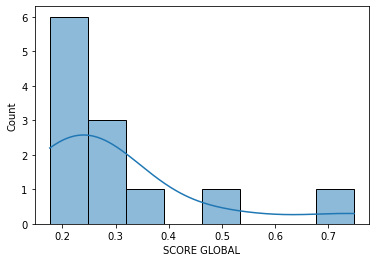

In [64]:
sns.histplot(df_meilleurs['SCORE GLOBAL'], kde = True)

<AxesSubplot:>

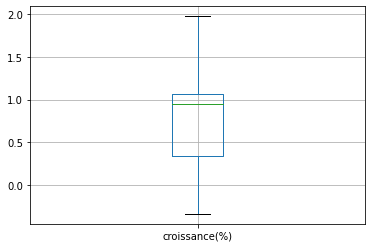

In [65]:
df_meilleurs.boxplot(column=['croissance(%)'])

<AxesSubplot:>

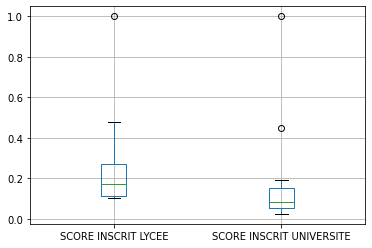

In [66]:
df_meilleurs.boxplot(column=['SCORE INSCRIT LYCEE', 'SCORE INSCRIT UNIVERSITE'])
#Présence d'outliers

### Exploration sans outliers Chine et USA

In [67]:
df_score_sans_outliers1 = df_score.drop(index=37)

In [68]:
df_score_sans_outliers = df_score_sans_outliers1.drop(index=187)
df_score_sans_outliers

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
141,Qatar,27866.0,40403.0,125000.0,94.291118,129378.0,High income: nonOECD,1.715004,0.001651,0.000643,0.959804,0.000657,1.00000,0.415842,0.475719
12,Bahrain,38901.0,37008.0,44250.0,97.999981,132609.0,High income: nonOECD,3.615325,0.001512,0.000897,0.997557,0.000673,0.35400,0.876619,0.446252
107,Malta,13216.0,15110.0,35840.0,77.289395,51504.0,High income: nonOECD,4.124170,0.000617,0.000305,0.786740,0.000261,0.28672,1.000000,0.414929
100,Luxembourg,6085.0,9797.0,70430.0,97.493930,65335.0,High income: OECD,1.960334,0.000400,0.000140,0.992405,0.000332,0.56344,0.475328,0.406409
101,"Macao SAR, China",30771.0,15239.0,98650.0,81.642985,62558.0,High income: nonOECD,1.379473,0.000623,0.000710,0.831056,0.000318,0.78920,0.334485,0.391278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Guyana,8857.0,27381.0,7810.0,35.660000,134890.0,Lower middle income,0.482244,0.001119,0.000204,0.362989,0.000685,0.06248,0.116931,0.108881
95,Lesotho,23545.0,36436.0,3340.0,27.360000,493814.0,Lower middle income,0.796017,0.001489,0.000543,0.278502,0.002506,0.02672,0.193013,0.100554
50,El Salvador,179396.0,126517.0,8240.0,28.997073,1411616.0,Lower middle income,0.504663,0.005169,0.004137,0.295166,0.007165,0.06592,0.122367,0.099985
33,Central African Republic,12522.0,24265.0,700.0,4.000000,1078382.0,Low income,1.766845,0.000991,0.000289,0.040717,0.005473,0.00560,0.428412,0.096296


In [69]:
df_meilleurs_sans_outliers = df_score_sans_outliers [df_score_sans_outliers['SCORE INSCRIT LYCEE'] > 0.1]
df_meilleurs_sans_outliers

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
24,Brazil,8285475.0,9139433.0,14840.0,59.682747,33595574.0,Upper middle income,0.712873,0.373413,0.191053,0.607520,0.170513,0.11872,0.172852,0.326814
84,Japan,3862460.0,2835697.0,42790.0,92.000000,12157426.0,High income: OECD,-0.340269,0.115859,0.089064,0.936482,0.061704,0.34232,-0.082506,0.292585
179,Turkey,6062886.0,2725972.0,24160.0,58.347734,13930222.0,Upper middle income,1.084194,0.111376,0.139803,0.593930,0.070702,0.19328,0.262888,0.274396
111,Mexico,3419391.0,3950126.0,17760.0,59.540446,20336734.0,Upper middle income,1.058240,0.161392,0.078847,0.606071,0.103218,0.14208,0.256595,0.269641
77,Indonesia,5107999.0,5703003.0,11240.0,25.366301,41819264.0,Lower middle income,1.065179,0.233010,0.117784,0.258207,0.212252,0.08992,0.258277,0.233890
157,South Africa,1018543.0,2609033.0,12880.0,54.000000,9998431.0,Upper middle income,1.273356,0.106598,0.023486,0.549674,0.050747,0.10304,0.308755,0.228460
131,Pakistan,1871575.0,4458868.0,5570.0,15.514558,39080811.0,Lower middle income,1.978320,0.182178,0.043156,0.157925,0.198353,0.04456,0.479689,0.221172
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518,0.103470,0.056878,0.473331,0.085977,0.04936,0.219321,0.197667
13,Bangladesh,2068355.0,5355156.5,3790.0,18.246938,34400594.0,Low income,1.002774,0.218798,0.047694,0.185738,0.174599,0.03032,0.243146,0.180059
173,Thailand,2235450.0,2721167.0,16100.0,47.504966,9149718.0,Upper middle income,0.250165,0.111180,0.051547,0.483560,0.046439,0.12880,0.060658,0.176437


<AxesSubplot:>

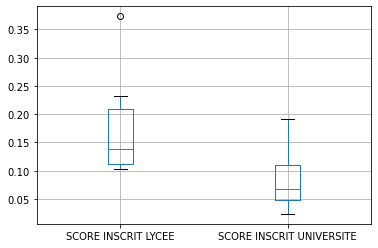

In [70]:
df_meilleurs_sans_outliers.boxplot(column=['SCORE INSCRIT LYCEE', 'SCORE INSCRIT UNIVERSITE'])
#Présence d'outliers

## <a id =6 style='color:Green'> Calcul croissance Pays top 10 </a>
<span style='color:Green'> _____ </span>

### Selection Pays + metrics

In [71]:
df_meilleurs.head(10)

,pays,nbre_inscrits_univ,nbre_inscrits_lycee,GNI-PPP par pers,utilisateur d'internet / 100 pers.,pop 15-24 ans,revenu,croissance(%),SCORE INSCRIT LYCEE,SCORE INSCRIT UNIVERSITE,SCORE INTERNET,SCORE POPULATION,SCORE GNI,CROISSANCE,SCORE GLOBAL
37,China,43367392.0,24475374.0,15500.0,53.200000,197026759.0,Upper middle income,0.314091,1.000000,1.000000,0.541531,1.000000,0.12400,0.076159,0.748338
187,United States,19531728.0,11736315.0,58700.0,76.176737,45147517.0,High income: OECD,0.350911,0.479515,0.450378,0.775415,0.229144,0.46960,0.085086,0.497828
24,Brazil,8285475.0,9139433.0,14840.0,59.682747,33595574.0,Upper middle income,0.712873,0.373413,0.191053,0.607520,0.170513,0.11872,0.172852,0.326814
84,Japan,3862460.0,2835697.0,42790.0,92.000000,12157426.0,High income: OECD,-0.340269,0.115859,0.089064,0.936482,0.061704,0.34232,-0.082506,0.292585
179,Turkey,6062886.0,2725972.0,24160.0,58.347734,13930222.0,Upper middle income,1.084194,0.111376,0.139803,0.593930,0.070702,0.19328,0.262888,0.274396
111,Mexico,3419391.0,3950126.0,17760.0,59.540446,20336734.0,Upper middle income,1.058240,0.161392,0.078847,0.606071,0.103218,0.14208,0.256595,0.269641
77,Indonesia,5107999.0,5703003.0,11240.0,25.366301,41819264.0,Lower middle income,1.065179,0.233010,0.117784,0.258207,0.212252,0.08992,0.258277,0.233890
157,South Africa,1018543.0,2609033.0,12880.0,54.000000,9998431.0,Upper middle income,1.273356,0.106598,0.023486,0.549674,0.050747,0.10304,0.308755,0.228460
131,Pakistan,1871575.0,4458868.0,5570.0,15.514558,39080811.0,Lower middle income,1.978320,0.182178,0.043156,0.157925,0.198353,0.04456,0.479689,0.221172
191,Vietnam,2466643.0,2532465.0,6170.0,46.500000,16939813.0,Lower middle income,0.904518,0.103470,0.056878,0.473331,0.085977,0.04936,0.219321,0.197667


In [72]:
_index2 = data['PAYS'].isin(['China'])
data_china = data[_index2]
data_china

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
243094,China,"Enrolment in tertiary education, all programme...",31308378.0,3.258596e+07,34091288.0,41924200.0,43367392.0,NaN
243110,China,"Enrolment in upper secondary general, both sex...",24280180.0,2.455473e+07,24822886.0,24475374.0,NaN,NaN
243142,China,"GNI per capita, PPP (current international $)",10290.0,1.132000e+04,12270.0,13460.0,14420.0,15500.0
243265,China,Internet users (per 100 people),38.3,4.230012e+01,45.8,47.9,50.3,53.2
244372,China,"Population, ages 15-24, total",215914397.0,2.117359e+08,206846521.0,201802535.0,197026759.0,NaN


In [73]:
data_china_year = data_china.loc[:, ['2011', '2012', '2013', '2014']]
data_china_year

,2011,2012,2013,2014
243094,31308378.0,3.258596e+07,34091288.0,41924200.0
243110,24280180.0,2.455473e+07,24822886.0,24475374.0
243142,10290.0,1.132000e+04,12270.0,13460.0
243265,38.3,4.230012e+01,45.8,47.9
244372,215914397.0,2.117359e+08,206846521.0,201802535.0


In [74]:
_index3 = data['PAYS'].isin(['United States'])
data_usa = data[_index3]
data_usa

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
847819,United States,"Enrolment in tertiary education, all programme...",2.101613e+07,20994112.0,19972624.0,19700220.0,1.953173e+07,NaN
847835,United States,"Enrolment in upper secondary general, both sex...",1.180938e+07,11748263.0,11646415.0,11736315.0,NaN,NaN
847867,United States,"GNI per capita, PPP (current international $)",5.071000e+04,52850.0,54000.0,56160.0,5.790000e+04,58700.000000
847990,United States,Internet users (per 100 people),6.972946e+01,74.7,71.4,73.0,7.455420e+01,76.176737
849097,United States,"Population, ages 15-24, total",4.529614e+07,45343097.0,45307415.0,45230846.0,4.514752e+07,NaN


In [75]:
data_usa_year = data_usa.loc[:, ['2011', '2012', '2013', '2014']]

In [76]:
_index4 = data['PAYS'].isin(['Brazil'])
data_brazil = data[_index4]
data_brazil

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
188119,Brazil,"Enrolment in tertiary education, all programme...",6929324.00,7241405.00,7541112.00,8.072146e+06,8.285475e+06,NaN
188135,Brazil,"Enrolment in upper secondary general, both sex...",7979293.00,7945765.00,9139433.00,NaN,NaN,NaN
188167,Brazil,"GNI per capita, PPP (current international $)",14580.00,15070.00,15780.00,1.587000e+04,1.531000e+04,14840.000000
188290,Brazil,Internet users (per 100 people),45.69,48.56,51.04,5.455100e+01,5.832795e+01,59.682747
189397,Brazil,"Population, ages 15-24, total",33540594.00,33432501.00,33412052.00,3.346984e+07,3.359557e+07,NaN


In [77]:
data_brazil_year = data_brazil.loc[:, ['2011', '2012', '2013']]

In [78]:
_index5 = data['PAYS'].isin(['Japan'])
data_Japan = data[_index5]
data_Japan

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
448334,Japan,"Enrolment in tertiary education, all programme...",3.880544e+06,3.884638e+06,3.862749e+06,3.862460e+06,NaN,NaN
448350,Japan,"Enrolment in upper secondary general, both sex...",2.827504e+06,2.821937e+06,2.835697e+06,NaN,NaN,NaN
448382,Japan,"GNI per capita, PPP (current international $)",3.679000e+04,3.819000e+04,4.028000e+04,4.081000e+04,4.223000e+04,42790.0
448505,Japan,Internet users (per 100 people),7.905411e+01,7.949640e+01,8.821943e+01,8.910683e+01,9.105803e+01,92.0
449612,Japan,"Population, ages 15-24, total",1.247292e+07,1.235502e+07,1.227280e+07,1.221108e+07,1.215743e+07,NaN


In [79]:
data_Japan_year = data_Japan.loc[:, ['2011', '2012', '2013']]

In [80]:
_index6 = data['PAYS'].isin(['Turkey'])
data_Turkey = data[_index6]
data_Turkey

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
818499,Turkey,"Enrolment in tertiary education, all programme...",3.817086e+06,4353542.00,4975690.00,5472521.00,6.062886e+06,NaN
818515,Turkey,"Enrolment in upper secondary general, both sex...",2.130522e+06,1985927.00,2725972.00,NaN,NaN,NaN
818547,Turkey,"GNI per capita, PPP (current international $)",1.949000e+04,20480.00,22110.00,22910.00,2.380000e+04,24160.000000
818670,Turkey,Internet users (per 100 people),4.306571e+01,45.13,46.25,51.04,5.374498e+01,58.347734
819777,Turkey,"Population, ages 15-24, total",1.370821e+07,13783064.00,13859026.00,13913334.00,1.393022e+07,NaN


In [81]:
data_Turkey_year = data_Turkey.loc[:, ['2011', '2012', '2013']]

In [82]:
_index7 = data['PAYS'].isin(['Mexico'])
data_Mexico = data[_index7]
data_Mexico

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
558284,Mexico,"Enrolment in tertiary education, all programme...",2.981313e+06,3161195.00,3300348.00,3419391.00,NaN,NaN
558300,Mexico,"Enrolment in upper secondary general, both sex...",3.811473e+06,3950126.00,NaN,NaN,NaN,NaN
558332,Mexico,"GNI per capita, PPP (current international $)",1.596000e+04,16420.00,16440.00,17230.00,1.714000e+04,17760.000000
558455,Mexico,Internet users (per 100 people),3.717630e+01,39.75,43.46,44.39,5.743104e+01,59.540446
559562,Mexico,"Population, ages 15-24, total",2.004449e+07,20177898.00,20271973.00,20325060.00,2.033673e+07,NaN


In [83]:
data_Mexico_year = data_Mexico.loc[:, ['2011', '2012']]

In [84]:
_index8 = data['PAYS'].isin(['Indonesia'])
data_Indonesia = data[_index8]
data_Indonesia

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
419014,Indonesia,"Enrolment in tertiary education, all programme...",5364301.00,6233984.00,6423455.00,6463297.00,5.107999e+06,NaN
419030,Indonesia,"Enrolment in upper secondary general, both sex...",5107137.00,5256281.00,5593270.00,5703003.00,NaN,NaN
419062,Indonesia,"GNI per capita, PPP (current international $)",8590.00,9160.00,9680.00,10180.00,1.070000e+04,11240.000000
419185,Indonesia,Internet users (per 100 people),12.28,14.52,14.94,17.14,2.197607e+01,25.366301
420292,Indonesia,"Population, ages 15-24, total",42057105.00,41947672.00,41865701.00,41821108.00,4.181926e+07,NaN


In [85]:
data_Indonesia_year = data_Indonesia.loc[:, ['2011', '2012', '2013', '2014']]

In [86]:
_index9 = data['PAYS'].isin(['South Africa'])
data_South_Africa = data[_index9]
data_South_Africa

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
737869,South Africa,"Enrolment in tertiary education, all programme...",NaN,1005721.0,1035594.0,1018543.0,NaN,NaN
737885,South Africa,"Enrolment in upper secondary general, both sex...",2476425.00,2529663.0,2578092.0,2609033.0,NaN,NaN
737917,South Africa,"GNI per capita, PPP (current international $)",11930.00,12220.0,12540.0,12780.0,1.293000e+04,12880.0
738040,South Africa,Internet users (per 100 people),33.97,41.0,46.5,49.0,5.191912e+01,54.0
739147,South Africa,"Population, ages 15-24, total",9835899.00,9881207.0,9925487.0,9965374.0,9.998431e+06,NaN


In [87]:
data_South_Africa_year = data_South_Africa.loc[:, ['2012', '2013', '2014']]

In [88]:
_index10 = data['PAYS'].isin(['Pakistan'])
data_Pakistan = data[_index10]
data_Pakistan

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
635249,Pakistan,"Enrolment in tertiary education, all programme...",1572664.0,1816949.00,1915419.0,1931875.0,1871575.0,NaN
635265,Pakistan,"Enrolment in upper secondary general, both sex...",3907420.0,4042591.00,4300975.0,4458868.0,NaN,NaN
635297,Pakistan,"GNI per capita, PPP (current international $)",4500.0,4680.00,4860.0,5090.0,5320.0,5570.000000
635420,Pakistan,Internet users (per 100 people),9.0,9.96,10.9,12.0,14.0,15.514558
636527,Pakistan,"Population, ages 15-24, total",39187013.0,39348176.00,39370153.0,39273580.0,39080811.0,NaN


In [89]:
data_Pakistan_year = data_Pakistan.loc[:, ['2011', '2012', '2013', '2014']]

In [90]:
_index11 = data['PAYS'].isin(['Vietnam'])
data_Vietnam = data[_index11]
data_Vietnam

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016
866144,Vietnam,"Enrolment in tertiary education, all programme...",2229494.00,2261204.0,2250030.0,2692124.0,2466643.0,NaN
866160,Vietnam,"Enrolment in upper secondary general, both sex...",2835025.00,2755210.0,2675320.0,2532465.0,NaN,NaN
866192,Vietnam,"GNI per capita, PPP (current international $)",4510.00,4800.0,5070.0,5390.0,5740.0,6170.0
866315,Vietnam,Internet users (per 100 people),35.07,36.8,38.5,41.0,43.5,46.5
867422,Vietnam,"Population, ages 15-24, total",18280203.00,18017444.0,17671710.0,17298090.0,16939813.0,NaN


In [91]:
data_Vietnam_year = data_Vietnam.loc[:, ['2011', '2012', '2013', '2014']]

### Création fonction régression linéaire et affichage resutats

In [92]:
from sklearn import linear_model

In [93]:
def calc_coeff(dataframe):
    X = pd.DataFrame([0,1,2], columns=list('X'), index=['2011', '2012', '2013'])
    for l in range(5):
        y = dataframe.iloc[l]
        model = linear_model.LinearRegression()
        results = model.fit(X, y)
        print(results.coef_)

In [94]:
def calc_coeff2(dataframe):
    X = pd.DataFrame([0,1,2,3], columns=list('X'), index=['2011', '2012', '2013', '2014'])
    for l in range(5):
        y = dataframe.iloc[l]
        model = linear_model.LinearRegression()
        results = model.fit(X, y)
        print(results.coef_)

In [95]:
def calc_coeff3(dataframe):
    X = pd.DataFrame([0,1], columns=list('X'), index=['2011', '2012'])
    for l in range(5):
        y = dataframe.iloc[l]
        model = linear_model.LinearRegression()
        results = model.fit(X, y)
        print(results.coef_)

In [96]:
calc_coeff2(data_china_year)

[3335279.4]
[85373.6]
[1046.]
[3.22998825]
[-4722495.3]


In [97]:
coeff_croissance = ['3335279.4', '85373.6', '1046.', '3.22998825', '-4722495.3']
data_china['coeff_croissance'] = coeff_croissance
data_china

<ipython-input-97-f63d45dcaf32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_china['coeff_croissance'] = coeff_croissance


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
243094,China,"Enrolment in tertiary education, all programme...",31308378.0,3.258596e+07,34091288.0,41924200.0,43367392.0,NaN,3335279.4
243110,China,"Enrolment in upper secondary general, both sex...",24280180.0,2.455473e+07,24822886.0,24475374.0,NaN,NaN,85373.6
243142,China,"GNI per capita, PPP (current international $)",10290.0,1.132000e+04,12270.0,13460.0,14420.0,15500.0,1046.
243265,China,Internet users (per 100 people),38.3,4.230012e+01,45.8,47.9,50.3,53.2,3.22998825
244372,China,"Population, ages 15-24, total",215914397.0,2.117359e+08,206846521.0,201802535.0,197026759.0,NaN,-4722495.3


In [98]:
calc_coeff2(data_usa_year)

[-496920.6]
[-32104.9]
[1750.]
[0.65116177]
[-23156.7]


In [99]:
coeff_croissance2 = ['-496920.6', '-32104.9', '1750.', '0.65116177', '23156.7']
data_usa['coeff_croissance'] = coeff_croissance2
data_usa

<ipython-input-99-4f37777f1075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['coeff_croissance'] = coeff_croissance2


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
847819,United States,"Enrolment in tertiary education, all programme...",2.101613e+07,20994112.0,19972624.0,19700220.0,1.953173e+07,NaN,-496920.6
847835,United States,"Enrolment in upper secondary general, both sex...",1.180938e+07,11748263.0,11646415.0,11736315.0,NaN,NaN,-32104.9
847867,United States,"GNI per capita, PPP (current international $)",5.071000e+04,52850.0,54000.0,56160.0,5.790000e+04,58700.000000,1750.
847990,United States,Internet users (per 100 people),6.972946e+01,74.7,71.4,73.0,7.455420e+01,76.176737,0.65116177
849097,United States,"Population, ages 15-24, total",4.529614e+07,45343097.0,45307415.0,45230846.0,4.514752e+07,NaN,23156.7


In [100]:
calc_coeff(data_brazil_year)

[305894.]
[580070.]
[600.]
[2.675]
[-64271.]


In [101]:
coeff_croissance3 = ['305894.', '580070.', '600.', '2.675', '-64271.']
data_brazil['coeff_croissance'] = coeff_croissance3
data_brazil

<ipython-input-101-42119123a1c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brazil['coeff_croissance'] = coeff_croissance3


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
188119,Brazil,"Enrolment in tertiary education, all programme...",6929324.00,7241405.00,7541112.00,8.072146e+06,8.285475e+06,NaN,305894.
188135,Brazil,"Enrolment in upper secondary general, both sex...",7979293.00,7945765.00,9139433.00,NaN,NaN,NaN,580070.
188167,Brazil,"GNI per capita, PPP (current international $)",14580.00,15070.00,15780.00,1.587000e+04,1.531000e+04,14840.000000,600.
188290,Brazil,Internet users (per 100 people),45.69,48.56,51.04,5.455100e+01,5.832795e+01,59.682747,2.675
189397,Brazil,"Population, ages 15-24, total",33540594.00,33432501.00,33412052.00,3.346984e+07,3.359557e+07,NaN,-64271.


In [102]:
calc_coeff(data_Japan_year)

[-8897.5]
[4096.5]
[1745.]
[4.5826577]
[-100056.5]


In [103]:
coeff_croissance4 = ['-8897.5', '4096.5', '1745.', '4.5826577', '-100056.5']
data_Japan['coeff_croissance'] = coeff_croissance4
data_Japan

<ipython-input-103-5ffbc40b40b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Japan['coeff_croissance'] = coeff_croissance4


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
448334,Japan,"Enrolment in tertiary education, all programme...",3.880544e+06,3.884638e+06,3.862749e+06,3.862460e+06,NaN,NaN,-8897.5
448350,Japan,"Enrolment in upper secondary general, both sex...",2.827504e+06,2.821937e+06,2.835697e+06,NaN,NaN,NaN,4096.5
448382,Japan,"GNI per capita, PPP (current international $)",3.679000e+04,3.819000e+04,4.028000e+04,4.081000e+04,4.223000e+04,42790.0,1745.
448505,Japan,Internet users (per 100 people),7.905411e+01,7.949640e+01,8.821943e+01,8.910683e+01,9.105803e+01,92.0,4.5826577
449612,Japan,"Population, ages 15-24, total",1.247292e+07,1.235502e+07,1.227280e+07,1.221108e+07,1.215743e+07,NaN,-100056.5


In [104]:
calc_coeff(data_Turkey_year)

[579302.]
[297725.]
[1310.]
[1.59214478]
[75408.]


In [105]:
coeff_croissance5 = ['579302.', '297725.', '1310.', '1.59214478', '75408.']
data_Turkey['coeff_croissance'] = coeff_croissance5
data_Turkey

<ipython-input-105-58e85d399681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Turkey['coeff_croissance'] = coeff_croissance5


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
818499,Turkey,"Enrolment in tertiary education, all programme...",3.817086e+06,4353542.00,4975690.00,5472521.00,6.062886e+06,NaN,579302.
818515,Turkey,"Enrolment in upper secondary general, both sex...",2.130522e+06,1985927.00,2725972.00,NaN,NaN,NaN,297725.
818547,Turkey,"GNI per capita, PPP (current international $)",1.949000e+04,20480.00,22110.00,22910.00,2.380000e+04,24160.000000,1310.
818670,Turkey,Internet users (per 100 people),4.306571e+01,45.13,46.25,51.04,5.374498e+01,58.347734,1.59214478
819777,Turkey,"Population, ages 15-24, total",1.370821e+07,13783064.00,13859026.00,13913334.00,1.393022e+07,NaN,75408.


In [106]:
calc_coeff3(data_Mexico_year)

[179882.]
[138653.]
[460.]
[2.57370459]
[133409.]


In [107]:
coeff_croissance6 = ['179882.', '138653.', '460.', '2.57370459', '133409.']
data_Mexico['coeff_croissance'] = coeff_croissance6
data_Mexico

<ipython-input-107-4315bf09a8a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Mexico['coeff_croissance'] = coeff_croissance6


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
558284,Mexico,"Enrolment in tertiary education, all programme...",2.981313e+06,3161195.00,3300348.00,3419391.00,NaN,NaN,179882.
558300,Mexico,"Enrolment in upper secondary general, both sex...",3.811473e+06,3950126.00,NaN,NaN,NaN,NaN,138653.
558332,Mexico,"GNI per capita, PPP (current international $)",1.596000e+04,16420.00,16440.00,17230.00,1.714000e+04,17760.000000,460.
558455,Mexico,Internet users (per 100 people),3.717630e+01,39.75,43.46,44.39,5.743104e+01,59.540446,2.57370459
559562,Mexico,"Population, ages 15-24, total",2.004449e+07,20177898.00,20271973.00,20325060.00,2.033673e+07,NaN,133409.


In [108]:
calc_coeff2(data_Indonesia_year)

[348645.9]
[212458.7]
[529.]
[1.5]
[-78996.2]


In [109]:
coeff_croissance7 = ['348645.9', '212458.7', '529.', '1.5', '-78996.2']
data_Indonesia['coeff_croissance'] = coeff_croissance7
data_Indonesia

<ipython-input-109-cac0f2c0e667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Indonesia['coeff_croissance'] = coeff_croissance7


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
419014,Indonesia,"Enrolment in tertiary education, all programme...",5364301.00,6233984.00,6423455.00,6463297.00,5.107999e+06,NaN,348645.9
419030,Indonesia,"Enrolment in upper secondary general, both sex...",5107137.00,5256281.00,5593270.00,5703003.00,NaN,NaN,212458.7
419062,Indonesia,"GNI per capita, PPP (current international $)",8590.00,9160.00,9680.00,10180.00,1.070000e+04,11240.000000,529.
419185,Indonesia,Internet users (per 100 people),12.28,14.52,14.94,17.14,2.197607e+01,25.366301,1.5
420292,Indonesia,"Population, ages 15-24, total",42057105.00,41947672.00,41865701.00,41821108.00,4.181926e+07,NaN,-78996.2


In [110]:
calc_coeff(data_South_Africa_year)

[6411.]
[39685.]
[280.]
[4.]
[42083.5]


In [111]:
coeff_croissance8 = ['6411.', '39685.', '280.', '4.', '42083.5']
data_South_Africa['coeff_croissance'] = coeff_croissance8
data_South_Africa

<ipython-input-111-d75af2f5e469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_South_Africa['coeff_croissance'] = coeff_croissance8


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
737869,South Africa,"Enrolment in tertiary education, all programme...",NaN,1005721.0,1035594.0,1018543.0,NaN,NaN,6411.
737885,South Africa,"Enrolment in upper secondary general, both sex...",2476425.00,2529663.0,2578092.0,2609033.0,NaN,NaN,39685.
737917,South Africa,"GNI per capita, PPP (current international $)",11930.00,12220.0,12540.0,12780.0,1.293000e+04,12880.0,280.
738040,South Africa,Internet users (per 100 people),33.97,41.0,46.5,49.0,5.191912e+01,54.0,4.
739147,South Africa,"Population, ages 15-24, total",9835899.00,9881207.0,9925487.0,9965374.0,9.998431e+06,NaN,42083.5


In [112]:
calc_coeff2(data_Pakistan_year)

[117610.3]
[191272.8]
[195.]
[0.994]
[28167.8]


In [113]:
coeff_croissance9 = ['117610.3', '191272.8', '195.', '0.994', '28167.8']
data_Pakistan['coeff_croissance'] = coeff_croissance9
data_Pakistan

<ipython-input-113-ec6d29700c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Pakistan['coeff_croissance'] = coeff_croissance9


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
635249,Pakistan,"Enrolment in tertiary education, all programme...",1572664.0,1816949.00,1915419.0,1931875.0,1871575.0,NaN,117610.3
635265,Pakistan,"Enrolment in upper secondary general, both sex...",3907420.0,4042591.00,4300975.0,4458868.0,NaN,NaN,191272.8
635297,Pakistan,"GNI per capita, PPP (current international $)",4500.0,4680.00,4860.0,5090.0,5320.0,5570.000000,195.
635420,Pakistan,Internet users (per 100 people),9.0,9.96,10.9,12.0,14.0,15.514558,0.994
636527,Pakistan,"Population, ages 15-24, total",39187013.0,39348176.00,39370153.0,39273580.0,39080811.0,NaN,28167.8


In [114]:
calc_coeff2(data_Vietnam_year)

[137671.6]
[-98757.]
[291.]
[1.949]
[-329207.3]


In [115]:
coeff_croissance10 = ['137671.6', '-98757.', '291.', '1.949', '-329207.3']
data_Vietnam['coeff_croissance'] = coeff_croissance10
data_Vietnam

<ipython-input-115-dc8ca5e4bb90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Vietnam['coeff_croissance'] = coeff_croissance10


,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
866144,Vietnam,"Enrolment in tertiary education, all programme...",2229494.00,2261204.0,2250030.0,2692124.0,2466643.0,NaN,137671.6
866160,Vietnam,"Enrolment in upper secondary general, both sex...",2835025.00,2755210.0,2675320.0,2532465.0,NaN,NaN,-98757.
866192,Vietnam,"GNI per capita, PPP (current international $)",4510.00,4800.0,5070.0,5390.0,5740.0,6170.0,291.
866315,Vietnam,Internet users (per 100 people),35.07,36.8,38.5,41.0,43.5,46.5,1.949
867422,Vietnam,"Population, ages 15-24, total",18280203.00,18017444.0,17671710.0,17298090.0,16939813.0,NaN,-329207.3


In [116]:
frames = [data_china, data_usa, data_brazil, data_Japan, data_Turkey, data_Mexico, data_Indonesia, data_South_Africa, data_Pakistan, data_Vietnam]

In [117]:
unit = pd.concat(frames)
unit

,PAYS,INDICATEUR,2011,2012,2013,2014,2015,2016,coeff_croissance
243094,China,"Enrolment in tertiary education, all programme...",3.130838e+07,3.258596e+07,3.409129e+07,4.192420e+07,4.336739e+07,NaN,3335279.4
243110,China,"Enrolment in upper secondary general, both sex...",2.428018e+07,2.455473e+07,2.482289e+07,2.447537e+07,NaN,NaN,85373.6
243142,China,"GNI per capita, PPP (current international $)",1.029000e+04,1.132000e+04,1.227000e+04,1.346000e+04,1.442000e+04,15500.000000,1046.
243265,China,Internet users (per 100 people),3.830000e+01,4.230012e+01,4.580000e+01,4.790000e+01,5.030000e+01,53.200000,3.22998825
244372,China,"Population, ages 15-24, total",2.159144e+08,2.117359e+08,2.068465e+08,2.018025e+08,1.970268e+08,NaN,-4722495.3
847819,United States,"Enrolment in tertiary education, all programme...",2.101613e+07,2.099411e+07,1.997262e+07,1.970022e+07,1.953173e+07,NaN,-496920.6
847835,United States,"Enrolment in upper secondary general, both sex...",1.180938e+07,1.174826e+07,1.164642e+07,1.173632e+07,NaN,NaN,-32104.9
847867,United States,"GNI per capita, PPP (current international $)",5.071000e+04,5.285000e+04,5.400000e+04,5.616000e+04,5.790000e+04,58700.000000,1750.
847990,United States,Internet users (per 100 people),6.972946e+01,7.470000e+01,7.140000e+01,7.300000e+01,7.455420e+01,76.176737,0.65116177
849097,United States,"Population, ages 15-24, total",4.529614e+07,4.534310e+07,4.530742e+07,4.523085e+07,4.514752e+07,NaN,23156.7


In [118]:
data_coeff = unit.drop(columns = ['2011', '2012', '2013', '2014', '2015', '2016'])
data_coeff

,PAYS,INDICATEUR,coeff_croissance
243094,China,"Enrolment in tertiary education, all programme...",3335279.4
243110,China,"Enrolment in upper secondary general, both sex...",85373.6
243142,China,"GNI per capita, PPP (current international $)",1046.
243265,China,Internet users (per 100 people),3.22998825
244372,China,"Population, ages 15-24, total",-4722495.3
847819,United States,"Enrolment in tertiary education, all programme...",-496920.6
847835,United States,"Enrolment in upper secondary general, both sex...",-32104.9
847867,United States,"GNI per capita, PPP (current international $)",1750.
847990,United States,Internet users (per 100 people),0.65116177
849097,United States,"Population, ages 15-24, total",23156.7


In [119]:
df_coeff = data_coeff.pivot(index = 'PAYS', columns = 'INDICATEUR', values = 'coeff_croissance')
df_coeff

INDICATEUR,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
PAYS,,,,,
Brazil,305894.,580070.,600.,2.675,-64271.
China,3335279.4,85373.6,1046.,3.22998825,-4722495.3
Indonesia,348645.9,212458.7,529.,1.5,-78996.2
Japan,-8897.5,4096.5,1745.,4.5826577,-100056.5
Mexico,179882.,138653.,460.,2.57370459,133409.
Pakistan,117610.3,191272.8,195.,0.994,28167.8
South Africa,6411.,39685.,280.,4.,42083.5
Turkey,579302.,297725.,1310.,1.59214478,75408.
United States,-496920.6,-32104.9,1750.,0.65116177,23156.7


In [122]:
df_coeff.columns = ['coeff_inscrits_univ', 'coeff_inscrits_lycee', 'coeff GNI-PPP', 'coeff internet', 'coeff pop']
df_coeff

,coeff_inscrits_univ,coeff_inscrits_lycee,coeff GNI-PPP,coeff internet,coeff pop
PAYS,,,,,
Brazil,305894.,580070.,600.,2.675,-64271.
China,3335279.4,85373.6,1046.,3.22998825,-4722495.3
Indonesia,348645.9,212458.7,529.,1.5,-78996.2
Japan,-8897.5,4096.5,1745.,4.5826577,-100056.5
Mexico,179882.,138653.,460.,2.57370459,133409.
Pakistan,117610.3,191272.8,195.,0.994,28167.8
South Africa,6411.,39685.,280.,4.,42083.5
Turkey,579302.,297725.,1310.,1.59214478,75408.
United States,-496920.6,-32104.9,1750.,0.65116177,23156.7


In [124]:
df_coeff.dtypes

coeff_inscrits_univ     object
coeff_inscrits_lycee    object
coeff GNI-PPP           object
coeff internet          object
coeff pop               object
dtype: object

In [126]:
df_coeff['coeff_inscrits_univ'] = pd.to_numeric(df_coeff['coeff_inscrits_univ'])
df_coeff['coeff_inscrits_lycee'] = pd.to_numeric(df_coeff['coeff_inscrits_lycee'])
df_coeff['coeff GNI-PPP'] = pd.to_numeric(df_coeff['coeff GNI-PPP'])
df_coeff['coeff internet'] = pd.to_numeric(df_coeff['coeff internet'])
df_coeff['coeff pop'] = pd.to_numeric(df_coeff['coeff pop'])

In [139]:
df_coeff['SCORE COEFF UNIV'] = df_coeff['coeff_inscrits_univ'] / df_coeff['coeff_inscrits_univ'].abs().max()
df_coeff['SCORE COEFF LYCEE'] = df_coeff['coeff_inscrits_lycee'] / df_coeff['coeff_inscrits_lycee'].abs().max()
df_coeff['SCORE COEFF GNI'] = df_coeff['coeff GNI-PPP'] / df_coeff['coeff GNI-PPP'].abs().max()
df_coeff['SCORE COEFF INTERNET'] = df_coeff['coeff internet'] / df_coeff['coeff internet'].abs().max()
df_coeff['SCORE COEFF POP'] = df_coeff['coeff pop'] / df_coeff['coeff pop'].abs().max()
df_coeff['SCORE COEFF GLOBAL'] = (df_coeff['SCORE COEFF UNIV'] + df_coeff['SCORE COEFF LYCEE'] + df_coeff['SCORE COEFF GNI'] + df_coeff['SCORE COEFF INTERNET'] + df_coeff['SCORE COEFF POP']) / 5

In [140]:
df_coeff.sort_values(by='SCORE COEFF GLOBAL', ascending=False)

,coeff_inscrits_univ,coeff_inscrits_lycee,coeff GNI-PPP,coeff internet,coeff pop,SCORE COEFF LYCEE,SCORE COEFF UNIV,SCORE COEFF GNI,SCORE COEFF INTERNET,SCORE COEFF POP,SCORE COEFF GLOBAL
PAYS,,,,,,,,,,,
Brazil,305894.0,580070.0,600.0,2.675000,-64271.0,1.000000,0.091715,0.342857,0.583722,-0.013610,0.400937
Japan,-8897.5,4096.5,1745.0,4.582658,-100056.5,0.007062,-0.002668,0.997143,1.000000,-0.021187,0.396070
Turkey,579302.0,297725.0,1310.0,1.592145,75408.0,0.513257,0.173689,0.748571,0.347428,0.015968,0.359783
China,3335279.4,85373.6,1046.0,3.229988,-4722495.3,0.147178,1.000000,0.597714,0.704829,-1.000000,0.289944
Mexico,179882.0,138653.0,460.0,2.573705,133409.0,0.239028,0.053933,0.262857,0.561618,0.028250,0.229137
South Africa,6411.0,39685.0,280.0,4.000000,42083.5,0.068414,0.001922,0.160000,0.872856,0.008911,0.222421
Indonesia,348645.9,212458.7,529.0,1.500000,-78996.2,0.366264,0.104533,0.302286,0.327321,-0.016728,0.216735
United States,-496920.6,-32104.9,1750.0,0.651162,23156.7,-0.055347,-0.148989,1.000000,0.142093,0.004903,0.188532
Pakistan,117610.3,191272.8,195.0,0.994000,28167.8,0.329741,0.035263,0.111429,0.216905,0.005965,0.139860


## <a id =7 style='color:Green'> Recommandation sur pays à cibler </a>
<span style='color:Green'> _____ </span>

##### En considérant le nombre d'étudiants (Lycée et Université) comme étant le critère principal de recommandation (id le plus gros pool de clients), la Chine les États-Unis et le Brésil dominent largement les autres pays. Ces trois pays présentent également un bon score d'utilisateurs d'internet, ce qui permettra a Academy de beneficier d'une bonne accessibilité pour proposer ses cours en ligne. 
##### Malgré un GNI 4x supérieur pour les États-Unis, le coûts dissuasif des études universitaires (15k-100k€, contre 2k-10k€ au Brésil et en Chine) donne un axe de commercialisation très avantageux pour Academy.
##### Le Brésil présente le meilleur indicateur de croissance, principalement au vu de l'évolution des inscriptions au Lycée, mais aussi de l'utilisation d'internet et l'augmentation de la richesse/habitant
##### Reste à discuter du facteur concurrentiel sur la thématique des cours en ligne dans ces pays